## Analyzing the Data

Importing the neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
#from sklearn.mixture import GaussianMixture
#from scipy.stats import norm, multivariate_normal

Reading the data

In [ ]:
data = pd.read_csv("heightWeightData.txt" , names=["gender","height","weight"])

In [ ]:
data.head()

,gender,height,weight
0,1,67,125
1,2,68,140
2,2,67,142
3,2,60,110
4,2,64,97


Reading the data for males from our original data

In [ ]:
male_data = data[data['gender'] == 1]

In [ ]:
male_data.head()

,gender,height,weight
0,1,67,125
6,1,79,210
8,1,71,150
11,1,71,175
12,1,72,145


Pre-calculating some useful information 

In [ ]:
maxheight = max(male_data['height'])
minheight = min(male_data['height'])
maxweight = max(male_data['weight'])
minweight = min(male_data['weight'])

Our data frame for the male data is stored in the intermediateMatrix

In [ ]:
intermediateMatrix = pd.DataFrame(male_data,columns=['height','weight'])

In [ ]:
intermediateMatrix.head()

,height,weight
0,67,125
6,79,210
8,71,150
11,71,175
12,72,145


Creating numpy arrays for heights and weights from our dataframe

In [ ]:
height = intermediateMatrix['height'].to_numpy()
print(height)

[67 79 71 71 72 71 70 72 71 71 75 65 75 68 73 68 74 73 72 75 78 73 70 69
 72 70 72 66 68 67 69 71 70 73 74 79 71 73 70 75 67 69 69 73 74 65 73 74
 72 73 74 75 68 72 71 66 77 70 71 72 69 73 73 71 73 69 76 71 73 79 75 71
 70]


In [ ]:
weight = intermediateMatrix['weight'].to_numpy()
print(weight)

[125 210 150 175 145 152 143 160 185 155 200 150 240 135 178 190 180 165
 210 225 190 280 195 168 215 185 178 145 135 145 193 148 167 250 280 180
 175 125 156 185 140 155 170 247 172 147 165 180 182 160 190 180 165 160
 174 150 245 150 135 160 155 155 160 162 205 180 185 178 165 165 160 170
 185]


Calculating the covariance Matrix 

In [ ]:
covMatrix = np.cov(intermediateMatrix,rowvar=0)
print(covMatrix)

[[   9.78386606   47.5890411 ]
 [  47.5890411  1049.65639269]]


Calculating the mean vectors 

In [ ]:
mean1, mean2 = np.mean(intermediateMatrix,axis=0)
meanmatrix = np.array([mean1, mean2])
print(meanmatrix)

[ 71.65753425 175.61643836]


Calculating the inverse of the covariance matrix 

In [ ]:
inverseMat = np.linalg.inv(covMatrix) 
print(inverseMat)

[[ 0.13112541 -0.00594493]
 [-0.00594493  0.00122222]]


## Writing our own 2D - Gaussian function  

In [ ]:
def Gaussian2d(x,y,meanmatrix,inverseMat,covMatrix):
  X = [x,y] # (1,2) input vector 
  
  sigmadet = np.linalg.det(covMatrix) 
  rootsigmadet = math.sqrt(sigmadet)

  constantTerm = 0.5/(math.pi * rootsigmadet) 

  # temp = X - mu 
  temp = (X - meanmatrix).T 
  tempT = temp.T  

  matrixmul = np.dot(np.dot(tempT,inverseMat),temp) 
  expTerm = math.exp((-0.5) * matrixmul)

  output = constantTerm * expTerm

  return output 

Testing whether our gaussian function works correctly or not for a test input

In [ ]:
output = Gaussian2d(79,210,meanmatrix,inverseMat,covMatrix) 
print("The output is : ", output)   

The output is :  0.00011301314491292489


## Plotting our data 

Creating our x , y and z vectors which would be useful for our plotting 

In [ ]:
x1 = np.linspace(65,79,155)  
y1 = np.linspace(125,280,155) 

z1 = np.zeros(shape = (x1.shape[0],y1.shape[0])) 

for i in range (x1.shape[0]) :
  for j in range (y1.shape[0]) : 
    z1[j][i] = Gaussian2d(x1[i],y1[j],meanmatrix,inverseMat,covMatrix) 

Plotting the ellipses of the gaussian over the scatter plot of our Height / Weight Data

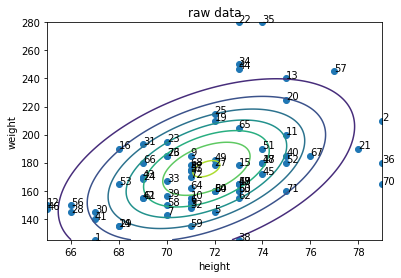

In [ ]:
fig = plt.figure()
plt.contour(x1,y1,z1)
plt.scatter(male_data['height'],male_data['weight'])
plt.title("raw data") #title
plt.xlabel("height") #x label
plt.ylabel("weight") #y label
for i in range(1,74):
  plt.annotate(i,(height[i-1],weight[i-1]))
plt.show()

## Standardizing the Data

In [ ]:
stdheight = (height - mean1)/np.std(height) 
print(stdheight)

[-1.49932571  2.36364289 -0.21166951 -0.21166951  0.11024454 -0.21166951
 -0.53358356  0.11024454 -0.21166951 -0.21166951  1.07598669 -2.14315382
  1.07598669 -1.17741166  0.43215859 -1.17741166  0.75407264  0.43215859
  0.11024454  1.07598669  2.04172884  0.43215859 -0.53358356 -0.85549761
  0.11024454 -0.53358356  0.11024454 -1.82123976 -1.17741166 -1.49932571
 -0.85549761 -0.21166951 -0.53358356  0.43215859  0.75407264  2.36364289
 -0.21166951  0.43215859 -0.53358356  1.07598669 -1.49932571 -0.85549761
 -0.85549761  0.43215859  0.75407264 -2.14315382  0.43215859  0.75407264
  0.11024454  0.43215859  0.75407264  1.07598669 -1.17741166  0.11024454
 -0.21166951 -1.82123976  1.71981479 -0.53358356 -0.21166951  0.11024454
 -0.85549761  0.43215859  0.43215859 -0.21166951  0.43215859 -0.85549761
  1.39790074 -0.21166951  0.43215859  2.36364289  1.07598669 -0.21166951
 -0.53358356]


In [ ]:
stdweight = (weight - mean2)/np.std(weight)
print(stdweight)

[-1.57312483  1.06861795 -0.79614166 -0.01915849 -0.9515383  -0.73398301
 -1.01369695 -0.48534839  0.29163478 -0.64074503  0.75782468 -0.79614166
  2.00099776 -1.26233156  0.07407949  0.44703141  0.13623815 -0.32995176
  1.06861795  1.53480786  0.44703141  3.24417083  0.60242805 -0.23671378
  1.22401459  0.29163478  0.07407949 -0.9515383  -1.26233156 -0.9515383
  0.54026939 -0.85830032 -0.2677931   2.31179103  3.24417083  0.13623815
 -0.01915849 -1.57312483 -0.6096657   0.29163478 -1.10693493 -0.64074503
 -0.17455512  2.21855305 -0.11239647 -0.88937964 -0.32995176  0.13623815
  0.1983968  -0.48534839  0.44703141  0.13623815 -0.32995176 -0.48534839
 -0.05023782 -0.79614166  2.15639439 -0.79614166 -1.26233156 -0.48534839
 -0.64074503 -0.64074503 -0.48534839 -0.42318974  0.91322132  0.13623815
  0.29163478  0.07407949 -0.32995176 -0.32995176 -0.48534839 -0.17455512
  0.29163478]


In [ ]:
std_male_data = np.array([stdheight,stdweight]).T
print(std_male_data)

[[-1.49932571 -1.57312483]
 [ 2.36364289  1.06861795]
 [-0.21166951 -0.79614166]
 [-0.21166951 -0.01915849]
 [ 0.11024454 -0.9515383 ]
 [-0.21166951 -0.73398301]
 [-0.53358356 -1.01369695]
 [ 0.11024454 -0.48534839]
 [-0.21166951  0.29163478]
 [-0.21166951 -0.64074503]
 [ 1.07598669  0.75782468]
 [-2.14315382 -0.79614166]
 [ 1.07598669  2.00099776]
 [-1.17741166 -1.26233156]
 [ 0.43215859  0.07407949]
 [-1.17741166  0.44703141]
 [ 0.75407264  0.13623815]
 [ 0.43215859 -0.32995176]
 [ 0.11024454  1.06861795]
 [ 1.07598669  1.53480786]
 [ 2.04172884  0.44703141]
 [ 0.43215859  3.24417083]
 [-0.53358356  0.60242805]
 [-0.85549761 -0.23671378]
 [ 0.11024454  1.22401459]
 [-0.53358356  0.29163478]
 [ 0.11024454  0.07407949]
 [-1.82123976 -0.9515383 ]
 [-1.17741166 -1.26233156]
 [-1.49932571 -0.9515383 ]
 [-0.85549761  0.54026939]
 [-0.21166951 -0.85830032]
 [-0.53358356 -0.2677931 ]
 [ 0.43215859  2.31179103]
 [ 0.75407264  3.24417083]
 [ 2.36364289  0.13623815]
 [-0.21166951 -0.01915849]
 

Calculating the mean and covariance matrix of the standardized data

In [ ]:
stdmeanmatrix = np.array([0,0])
print(stdmeanmatrix)
stdcovMatrix = np.cov(std_male_data,rowvar=0)
print(stdcovMatrix)
stdinverse = np.linalg.inv(stdcovMatrix) 
print(stdinverse)

[0 0]
[[1.01388889 0.47612226]
 [0.47612226 1.01388889]]
[[ 1.26533931 -0.59420339]
 [-0.59420339  1.26533931]]


## Plotting the Standardized data

In [ ]:
x2 = np.linspace(-2.2,3,100)  
y2 = np.linspace(-2,3.5,100) 

z2 = np.zeros(shape = (x2.shape[0],y2.shape[0])) 

for i in range (x2.shape[0]) :
  for j in range (y2.shape[0]) : 
    z2[j][i] = Gaussian2d(x2[i],y2[j],stdmeanmatrix,stdinverse,stdcovMatrix) 
print(z2)

[[9.04621912e-03 9.81976351e-03 1.06223072e-02 ... 2.25943678e-06
  1.74812507e-06 1.34781011e-06]
 [9.66356480e-03 1.05081031e-02 1.13866294e-02 ... 2.85571482e-06
  2.21329946e-06 1.70942252e-06]
 [1.02828037e-02 1.12008644e-02 1.21583722e-02 ... 3.59528562e-06
  2.79133380e-06 2.15960364e-06]
 ...
 [6.92682840e-08 8.89636794e-08 1.13860987e-07 ... 2.10558380e-04
  1.92747706e-04 1.75828717e-04]
 [5.06623045e-08 6.51802893e-08 8.35663679e-08 ... 1.82207993e-04
  1.67084878e-04 1.52683030e-04]
 [3.69096030e-08 4.75689703e-08 6.10930811e-08 ... 1.57060233e-04
  1.44274307e-04 1.32067408e-04]]


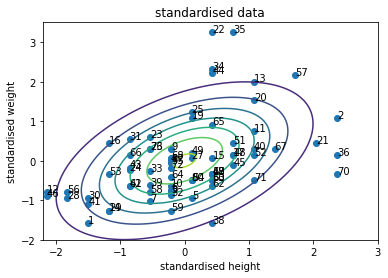

In [ ]:
fig = plt.figure()
plt.contour(x2,y2,z2)
plt.scatter(stdheight,stdweight)
plt.title("standardised data") #title
plt.xlabel("standardised height") #x label
plt.ylabel("standardised weight") #y label
for i in range(1,74):
 plt.annotate(i,(stdheight[i-1],stdweight[i-1]))
plt.show()

## Whitening of the data

Calculating the eigen-value and eigen-vector matrices 

In [ ]:
eigvals, eigvects = np.linalg.eig(covMatrix)
print(eigvals)
print (eigvals.shape)
print(eigvects)
print(eigvects.shape)

[   7.61052906 1051.8297297 ]
(2,)
[[-0.99895881 -0.0456213 ]
 [ 0.0456213  -0.99895881]]
(2, 2)


In [ ]:
eigvalmat = np.array([[eigvals[0],0], [0,eigvals[1]]])
print(eigvalmat) 

[[   7.61052906    0.        ]
 [   0.         1051.8297297 ]]


Calculating the inverse half power matrix of the eigen-value matrix 

In [ ]:
eigvalpow_half=np.zeros(shape = (2,2))
for i in range(2):
  eigvalpow_half[i][i]=pow(eigvalmat[i][i],-0.5)
print(eigvalpow_half)

[[0.36248712 0.        ]
 [0.         0.03083382]]


Doing the necessary matrix multiplications to find the whitened height and weight

In [ ]:
UT = eigvects.T
whiteMat = np.matmul(eigvalpow_half,UT)
print(whiteMat)

whiteHeight = np.zeros(height.shape)
whiteWeight = np.zeros(height.shape)

for i in range(height.shape[0]):
  whiteHeight[i] = (whiteMat[0][0] * height[i]) + (whiteMat[0][1] * weight[i]) 
  whiteWeight[i] = (whiteMat[1][0] * height[i]) + (whiteMat[1][1] * weight[i]) 

print(whiteHeight) # testing if everything works fine till now or not

[[-0.3621097   0.01653714]
 [-0.00140668 -0.03080171]]
[-22.19420783 -25.13386772 -23.22921825 -22.81578987 -23.67401362
 -23.19614397 -22.98286849 -23.42595659 -22.65041852 -23.14653257
 -23.85080028 -21.05656006 -23.18931487 -22.39094618 -23.49039786
 -21.48140375 -23.81943328 -23.70538061 -22.59909983 -23.4373719
 -25.10250072 -21.80361007 -22.12293747 -22.20733042 -22.51641416
 -22.28830882 -23.12828816 -21.50135543 -22.39094618 -21.86346513
 -21.79390204 -23.26229252 -22.58597725 -22.29972413 -22.16571977
 -25.62998177 -22.81578987 -24.36686602 -22.76788574 -24.0988573
 -21.94615081 -22.42231317 -22.17425615 -22.34933553 -23.95173036
 -21.10617147 -23.70538061 -23.81943328 -23.06213962 -23.78806629
 -23.65406193 -24.18154298 -21.89483213 -23.42595659 -22.832327
 -21.41866976 -23.83084859 -22.86710855 -23.47727527 -23.42595659
 -22.42231317 -23.87075196 -23.78806629 -23.03077262 -23.04389521
 -22.0088848  -24.460967   -22.76617846 -23.70538061 -25.8780388
 -24.51228568 -22.89847554

Our whitened data is ready in white_male_data

In [ ]:
white_male_data = np.array([whiteHeight,whiteWeight]).T
print(white_male_data)

[[-22.19420783  -3.94446151]
 [-25.13386772  -6.5794872 ]
 [-23.22921825  -4.72013103]
 [-22.81578987  -5.49017384]
 [-23.67401362  -4.56752915]
 [-23.19614397  -4.78173446]
 [-22.98286849  -4.50311237]
 [-23.42595659  -5.02955484]
 [-22.65041852  -5.79819096]
 [-23.14653257  -4.8741396 ]
 [-23.85080028  -6.26584336]
 [-21.05656006  -4.71169096]
 [-23.18931487  -7.49791185]
 [-22.39094618  -4.25388531]
 [-23.49039786  -5.58539233]
 [-21.48140375  -5.94797949]
 [-23.81943328  -5.64840244]
 [-23.70538061  -5.18497008]
 [-22.59909983  -6.56964045]
 [-23.4373719   -7.03588617]
 [-25.10250072  -5.96204628]
 [-21.80361007  -8.72716698]
 [-22.12293747  -6.10480141]
 [-22.20733042  -5.2717485 ]
 [-22.51641416  -6.72364901]
 [-22.28830882  -5.79678428]
 [-23.12828816  -5.58398566]
 [-21.50135543  -4.55908908]
 [-22.39094618  -4.25388531]
 [-21.86346513  -4.56049576]
 [-21.79390204  -6.0417913 ]
 [-23.26229252  -4.65852761]
 [-22.58597725  -5.24235346]
 [-22.29972413  -7.80311561]
 [-22.16571977

Finding the covariance matrix, inverse of the covariance matrix and the mean vector for our whitened data

In [ ]:
whiteCovMat = np.cov(white_male_data,rowvar = 0)
print(whiteCovMat)

[[ 1.00000000e+00 -5.01455923e-17]
 [-5.01455923e-17  1.00000000e+00]]


In [ ]:
whiteinverse= np.linalg.inv(whiteCovMat) 
whitemean1, whitemean2 = np.mean(white_male_data,axis=0)
whitemeanmatrix=np.array([whitemean1,whitemean2]).T
print(whiteinverse)
print(whitemeanmatrix)

[[1.00000000e+00 5.01455923e-17]
 [5.01455923e-17 1.00000000e+00]]
[-23.04369527  -5.51008614]


## Plotting the whitened Data

In [ ]:
x3 = np.linspace(-26,-20,100)  
y3 = np.linspace(-9,-3,100) 

z3 = np.zeros(shape = (x3.shape[0],y3.shape[0])) 

for i in range (x3.shape[0]) :
  for j in range (y3.shape[0]) : 
    z3[j][i] = Gaussian2d(x3[i],y3[j],whitemeanmatrix,whiteinverse,whiteCovMat) 
print(z3)

[[4.56315958e-06 5.44854560e-06 6.48187002e-06 ... 5.04012170e-06
  4.21425780e-06 3.51079904e-06]
 [5.62763148e-06 6.71955609e-06 7.99392945e-06 ... 6.21585703e-06
  5.19733957e-06 4.32978134e-06]
 [6.91497221e-06 8.25667846e-06 9.82256927e-06 ... 7.63775644e-06
  6.38624950e-06 5.32023423e-06]
 ...
 [1.16094572e-04 1.38620304e-04 1.64909842e-04 ... 1.28229302e-04
  1.07217915e-04 8.93207224e-05]
 [1.00262159e-04 1.19715941e-04 1.42420239e-04 ... 1.10742014e-04
  9.25960568e-05 7.71395967e-05]
 [8.62714271e-05 1.03010600e-04 1.22546706e-04 ... 9.52889077e-05
  7.96750647e-05 6.63754221e-05]]


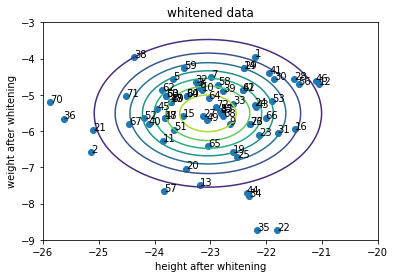

In [ ]:
fig = plt.figure()
plt.contour(x3,y3,z3)
plt.scatter(whiteHeight,whiteWeight)
plt.title("whitened data") #title
plt.xlabel("height after whitening") #x label
plt.ylabel("weight after whitening") #y label
for i in range(1,74):
 plt.annotate(i,(whiteHeight[i-1],whiteWeight[i-1]))
plt.show()